In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load dataset
data = pd.read_excel("heart_disease.xlsx" ,sheet_name ='Heart_disease')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [11]:
# Dataset Info
data.info()

#Check missing Values
data.isnull().sum()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [12]:
# EDA
#shape od dataset
print("Dataset Shape:",data.shape)

#Statistical Summary
print("\nStatistical Summary")
print(data.describe())

Dataset Shape: (908, 13)

Statistical Summary
              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000


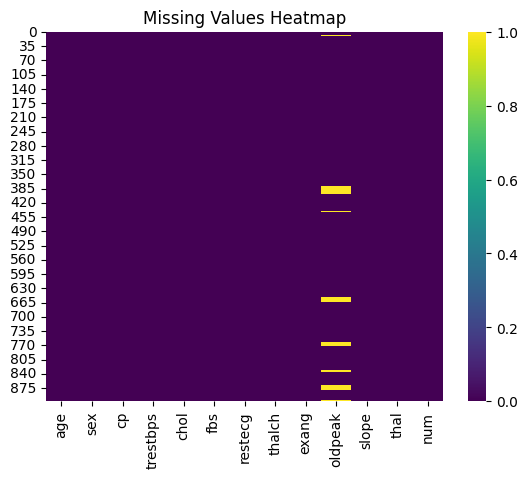

In [13]:
# Visualize missing values
sns.heatmap(data.isnull(),cmap="viridis",annot=False)
plt.title("Missing Values Heatmap")
plt.show()

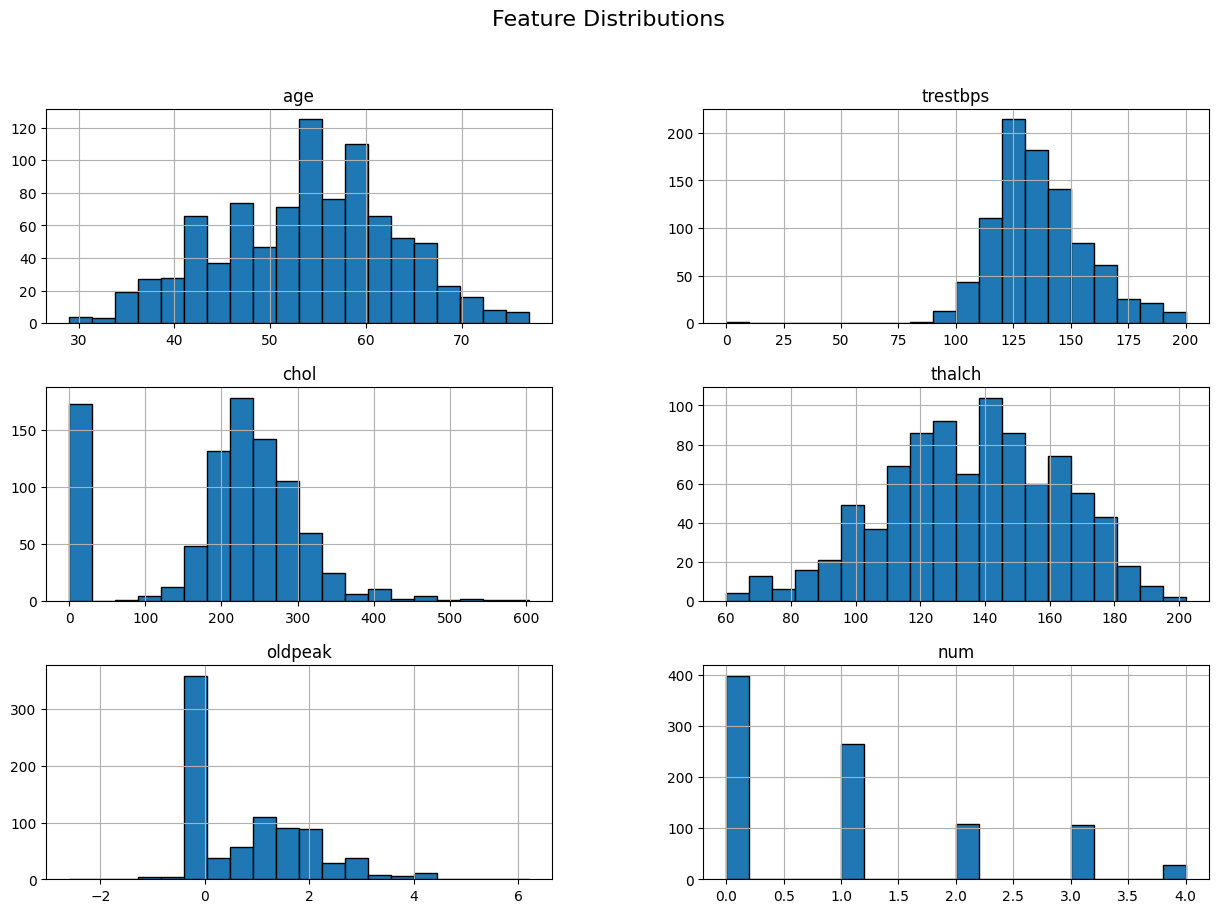

In [14]:
# Histograms of numerical features
data.hist(figsize=(15,10), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()



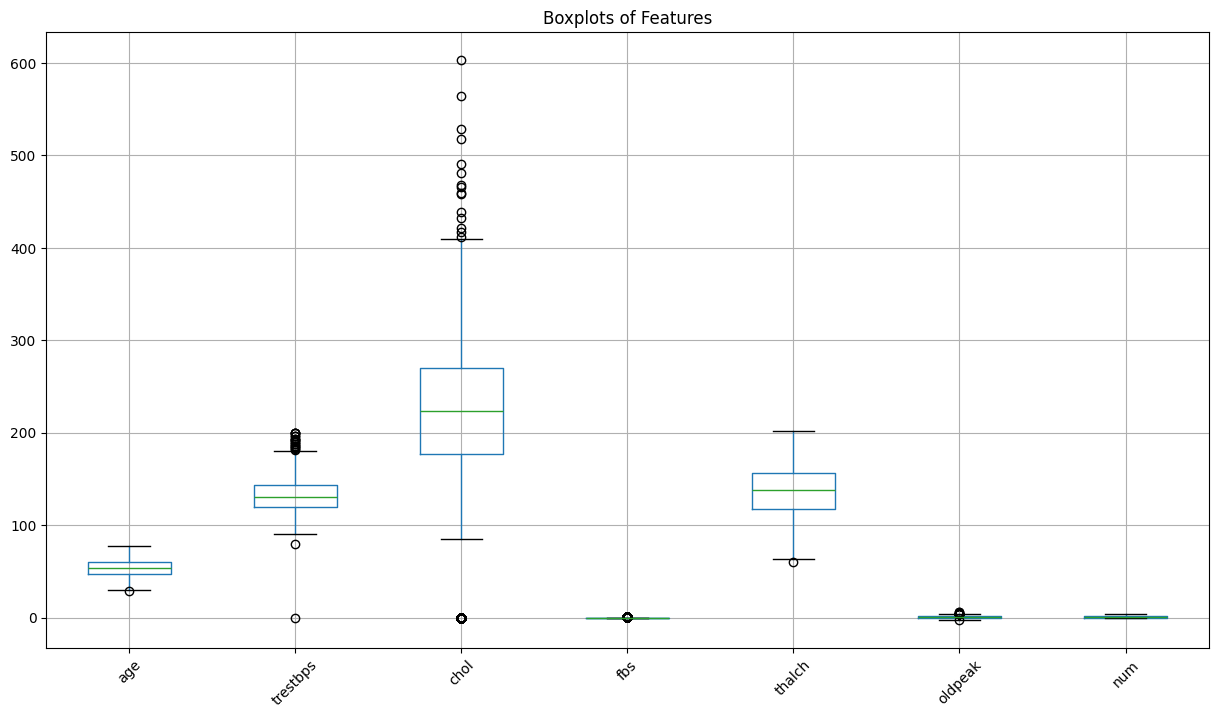

In [15]:
# Boxplots to detect outliers
plt.figure(figsize=(15,8))
data.boxplot()
plt.xticks(rotation=45)
plt.title("Boxplots of Features")
plt.show()

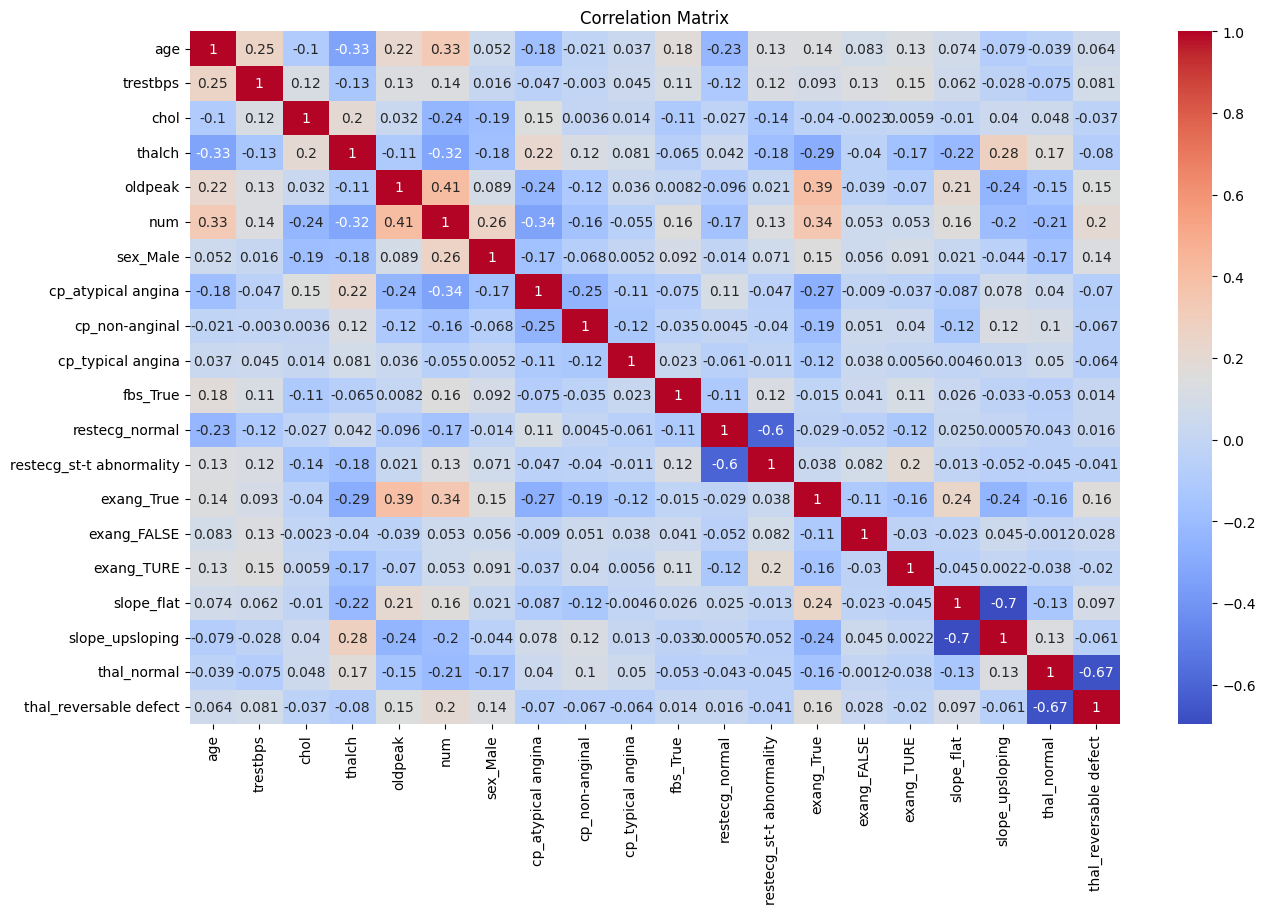

In [27]:
#Correlation matrix
plt.figure(figsize=(15,9))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [19]:
# Encode categorical variables (if present)
categorical_cols = data.select_dtypes(include=["object", "bool"]).columns
if len(categorical_cols) > 0:
    data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Handle missing values (if any)
# 'oldpeak' is the only column with missing values, and it's numerical
data['oldpeak'] = data['oldpeak'].fillna(data['oldpeak'].median())

# Features and target
X = data.drop("num", axis=1)   # 'num' appears to be the target column
y = data["num"]

Accuracy: 0.46153846153846156
Precision: 0.4903234705253339
Recall: 0.46153846153846156
F1-Score: 0.47386374600708686
ROC-AUC: 0.5795731114817053

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.62      0.67        80
           1       0.45      0.47      0.46        53
           2       0.11      0.14      0.12        22
           3       0.25      0.29      0.27        21
           4       0.00      0.00      0.00         6

    accuracy                           0.46       182
   macro avg       0.31      0.30      0.30       182
weighted avg       0.49      0.46      0.47       182



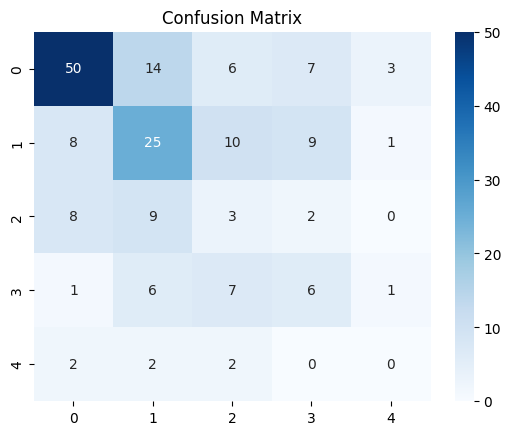

In [21]:
# Decision Tree Classification\
# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Build model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred = dt_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print("ROC-AUC:", roc_auc_score(y_test, dt_model.predict_proba(X_test), multi_class='ovr', average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [22]:
# Hyperparameter Tuning
# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Train best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluation of tuned model
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Tuned Model F1-Score:", f1_score(y_test, y_pred_best, average='weighted'))

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.575720358998583
Tuned Model Accuracy: 0.532967032967033
Tuned Model F1-Score: 0.48182389039531903


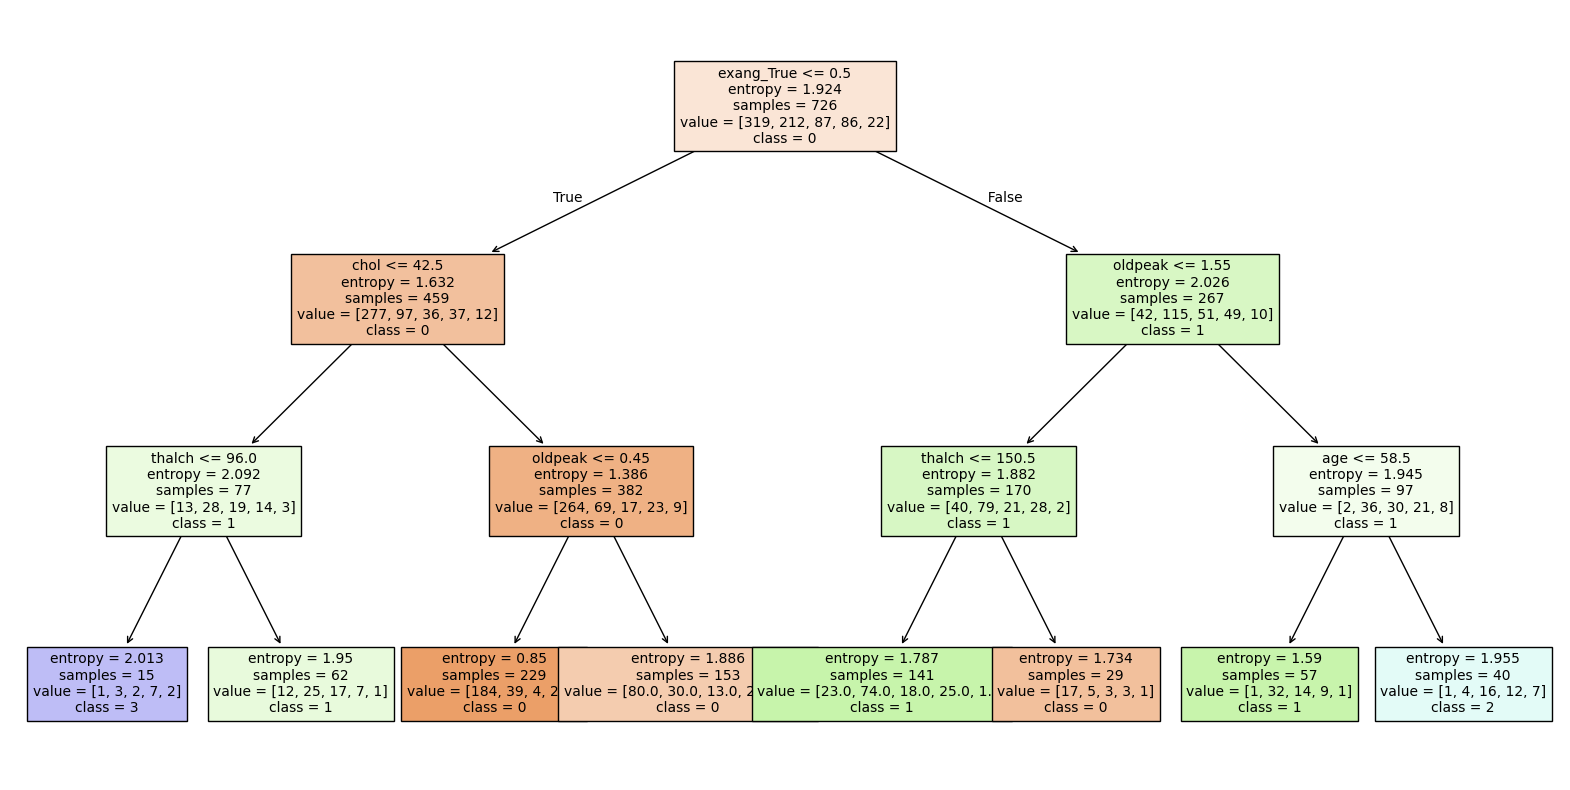

exang_True                  0.367091
oldpeak                     0.269055
chol                        0.201347
thalch                      0.094635
age                         0.067872
trestbps                    0.000000
sex_Male                    0.000000
cp_non-anginal              0.000000
cp_typical angina           0.000000
fbs_True                    0.000000
cp_atypical angina          0.000000
restecg_normal              0.000000
restecg_st-t abnormality    0.000000
exang_FALSE                 0.000000
exang_TURE                  0.000000
slope_flat                  0.000000
slope_upsloping             0.000000
thal_normal                 0.000000
thal_reversable defect      0.000000
dtype: float64


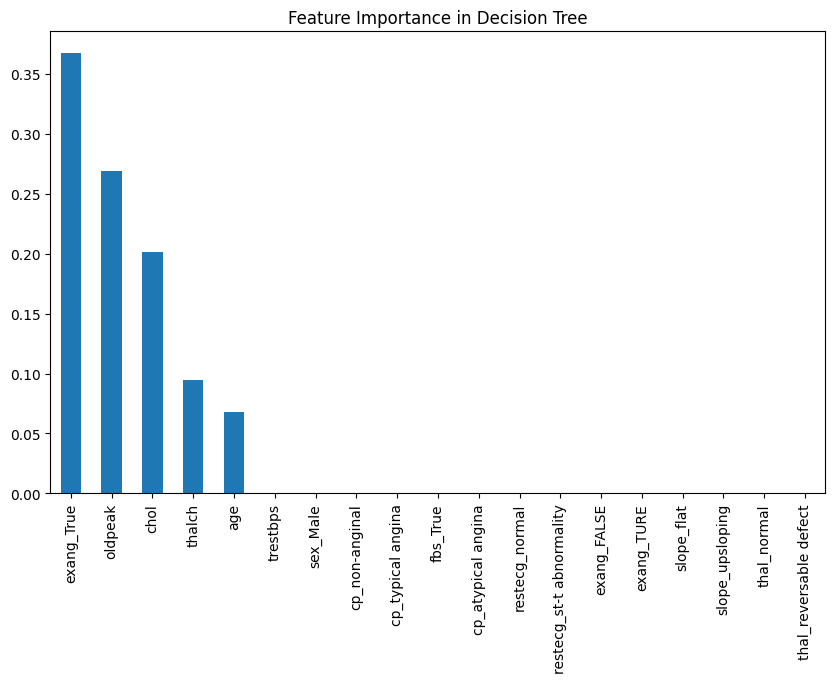

In [23]:
# Model Evaluation & Analysis
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=X.columns, class_names=[str(i) for i in sorted(y.unique())], filled=True, fontsize=10)
plt.show()

# Feature importance
importances = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)

# Plot feature importance
plt.figure(figsize=(10,6))
importances.plot(kind='bar')
plt.title("Feature Importance in Decision Tree")
plt.show()

**Q1. What are some common hyperparameters of decision tree models,and how do they affect the model's performance?**

- **max_depth :** Limits the depth of the tree.smaller depth prevents overfitting but may underfit.
- **min_samples_split :** Minimum samples required to split a node larger values reduce overfitting.
- **min_samples_leaf :** Mimimum samples per leaf. Higher values smooth the model.
- **criterion :** Metric used to measure split quality.

**Q2. What is the diffence between lable encoding and one-hot encoding?**
- **Label Encoding :** Converts categories into numeric values.Useful for ordinal data but may mislead models into thinking order matters.
  **e.g :** Male=0,Female=1
- **One-Hot Encoding :** Creates dummy variables. Avoids ordinal relationships but increases dimensionality.
**e.g :** Male=[1,0],Female=[0,1]